In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Load Pandas for data handling, Matplotlib for plotting, Scikit-learn for clustering, PCA for dimensionality reduction, and silhouette score for evaluation.

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Read the Mall Customers dataset and preview its contents.

In [3]:
# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


We select features that represent customers’ income and spending patterns.

C:\Users\Ramya Gadad\Documents\maths\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Gadad\Documents\maths\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Gadad\Documents\maths\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Gadad\Documents\maths\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

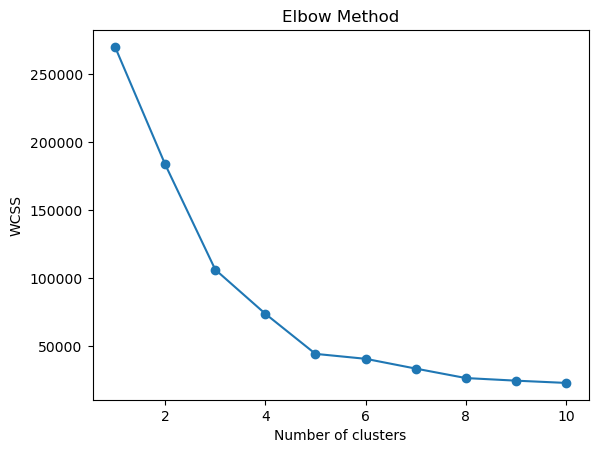

In [4]:
# Elbow Method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method helps find the optimal number of clusters by checking where the WCSS starts flattening.

In [5]:
# Fit K-Means with optimal K (example: K=5 from Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = y_kmeans
df.head()


C:\Users\Ramya Gadad\Documents\maths\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Train K-Means and assign each customer to a cluster.

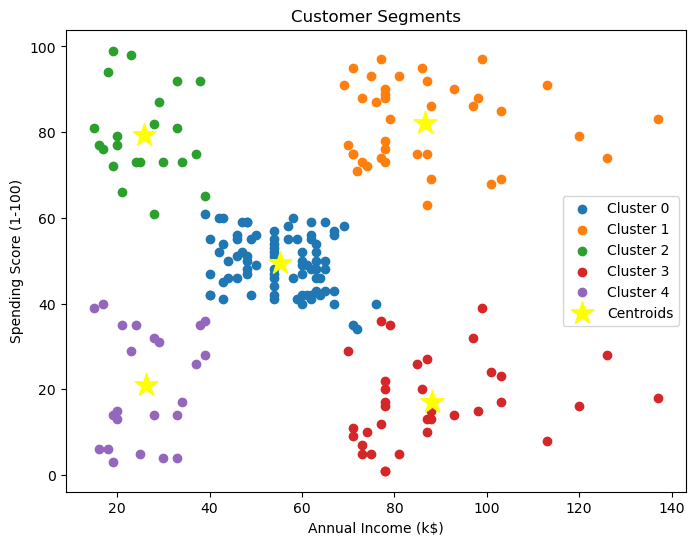

In [6]:
# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(
        X[y_kmeans == cluster]['Annual Income (k$)'],
        X[y_kmeans == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Plot customers with different colors for each cluster and mark centroids.

In [7]:
# Evaluate clustering performance
score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.55


The Silhouette Score measures how well customers are grouped (closer to 1 means better).